In [1]:
# --- matplotlib --------------------------------------------------------------
import matplotlib.pyplot as plt

# --- numpy -------------------------------------------------------------------
import numpy as np


# --- Our own modules ---------------------------------------------------------
import sys

# permatent location of functions from pyFitXPS
sys.path.insert(0, '/home/julio/Python/pyFitXPS/pyfitxps/') # Julio Laptop
import spec_xy_files as spxy
import fitxps 
import plot_config

In [2]:
experiment_sep_scan = spxy.load_xps_data("data/Cys_EtOH_H2O_separated_scans.xy")


Loaded multi-region file: Cys_EtOH_H2O_separated_scans.xy

Summary of XPS Data:
-------------------------------------------------------------------------------------------
| Region         | BE Range (eV)   | Pass Energy | Energy Step | Values | Scans | Comment |
-------------------------------------------------------------------------------------------
| S (0)          | -168.0 - -159.0 | 20          | 0.050       | 181    | 29    |         |
| C (0)          | -290.0 - -280.0 | 20          | 0.050       | 201    | 5     |         |
| Au (0)         | -94.0 - -80.0   | 20          | 0.050       | 281    | 4     |         |
| VB             | -12.0 - 2.0     | 20          | 0.050       | 281    | 9     |         |
| S (1)          | -168.0 - -159.0 | 20          | 0.050       | 181    | 29    |         |
| N 1s\          | -410.0 - -390.0 | 20          | 0.050       | 401    | 29    |         |
| C (1)          | -290.0 - -280.0 | 20          | 0.050       | 201    | 3     |         |

In [3]:
experiment_sep_scan.list_regions()

['S (0)',
 'C (0)',
 'Au (0)',
 'VB',
 'S (1)',
 'N 1s\\',
 'C (1)',
 'C (2)',
 'O 1s',
 'VB (2)',
 'N 1s_EtOH',
 'S 2p_EtOH',
 'Au 4f_EtOH',
 'C 1s_EtOH',
 'O 1s EtOH',
 'VB EtOH',
 'N 1s_EtOH (2)',
 'S 2p_EtOH (2)',
 'C 1s_EtOH (2)',
 'O 1s EtOH (2)',
 'N 1s_EtOH (3)',
 'S 2p_EtOH (3)',
 'Au 4f_EtOH (2)',
 'Spectrum (2)']

In [4]:
experiment_sep_scan.delete_regions(['Spectrum', 'Spectrum (2)'])

Deleted regions: Spectrum (2)
Regions not found: Spectrum


In [5]:
experiment_sep_scan.print_summary()


Summary of XPS Data:
-------------------------------------------------------------------------------------------
| Region         | BE Range (eV)   | Pass Energy | Energy Step | Values | Scans | Comment |
-------------------------------------------------------------------------------------------
| S (0)          | -168.0 - -159.0 | 20          | 0.050       | 181    | 29    |         |
| C (0)          | -290.0 - -280.0 | 20          | 0.050       | 201    | 5     |         |
| Au (0)         | -94.0 - -80.0   | 20          | 0.050       | 281    | 4     |         |
| VB             | -12.0 - 2.0     | 20          | 0.050       | 281    | 9     |         |
| S (1)          | -168.0 - -159.0 | 20          | 0.050       | 181    | 29    |         |
| N 1s\          | -410.0 - -390.0 | 20          | 0.050       | 401    | 29    |         |
| C (1)          | -290.0 - -280.0 | 20          | 0.050       | 201    | 3     |         |
| C (2)          | -300.0 - -280.0 | 20          | 0.050  

In [6]:
experiment_sep_scan.spectra['VB'].working_data.merged_scans['all_average']['data'][0][1]

1887.9737777777777

(<Figure size 1500x800 with 6 Axes>,
 array([[<Axes: title={'center': 'VB  Regions'}, xlabel='Binding Energy (eV)', ylabel='Intensity (a.u.)'>,
         <Axes: title={'center': 'S  Regions'}, xlabel='Binding Energy (eV)', ylabel='Intensity (a.u.)'>,
         <Axes: title={'center': 'Au Regions'}, xlabel='Binding Energy (eV)', ylabel='Intensity (a.u.)'>],
        [<Axes: title={'center': 'C Regions'}, xlabel='Binding Energy (eV)', ylabel='Intensity (a.u.)'>,
         <Axes: title={'center': 'O  Regions'}, xlabel='Binding Energy (eV)', ylabel='Intensity (a.u.)'>,
         <Axes: >]], dtype=object))

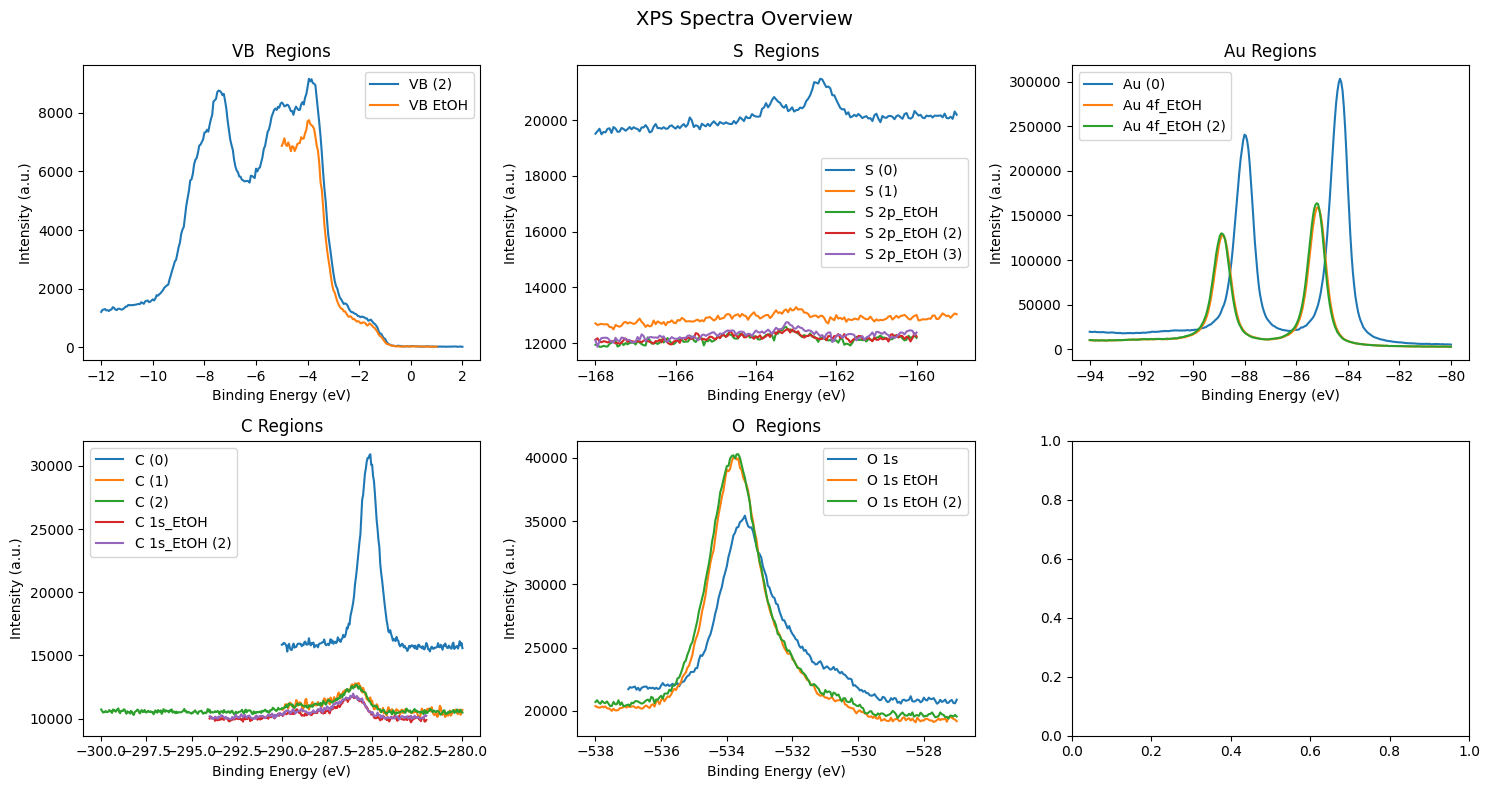

In [7]:
experiment_sep_scan.plot_all_regions(['VB ', 'S ', 'Au', 'C', 'O '])

In [8]:
# Correct single region
region = experiment_sep_scan.get_region("S (0)")
region.correct_energy_scale(0.5)

# Correct specific regions
experiment_sep_scan.correct_energy_scale(0.5, regions=["C (0)", "Au (0)"])

# Correct all regions
experiment_sep_scan.correct_energy_scale(0.5)

# Print summary to verify
experiment_sep_scan.print_summary()


Energy scale correction: -0.500 eV
Corrected regions: C (0), Au (0)

Energy scale correction: -0.500 eV
Corrected regions: S (0), C (0), Au (0), VB, S (1), N 1s\, C (1), C (2), O 1s, VB (2), N 1s_EtOH, S 2p_EtOH, Au 4f_EtOH, C 1s_EtOH, O 1s EtOH, VB EtOH, N 1s_EtOH (2), S 2p_EtOH (2), C 1s_EtOH (2), O 1s EtOH (2), N 1s_EtOH (3), S 2p_EtOH (3), Au 4f_EtOH (2)

Summary of XPS Data:
-------------------------------------------------------------------------------------------
| Region         | BE Range (eV)   | Pass Energy | Energy Step | Values | Scans | Comment |
-------------------------------------------------------------------------------------------
| S (0)          | -168.5 - -159.5 | 20          | 0.050       | 181    | 29    |         |
| C (0)          | -290.5 - -280.5 | 20          | 0.050       | 201    | 5     |         |
| Au (0)         | -94.5 - -80.5   | 20          | 0.050       | 281    | 4     |         |
| VB             | -12.5 - 1.5     | 20          | 0.050       |

In [9]:
be_min_original = experiment_sep_scan.spectra['S (0)'].original_data.binding_energy.min()
be_min_working = experiment_sep_scan.spectra['S (0)'].working_data.binding_energy.min()

print(f"BE min original: {be_min_original:.2f} eV")
print(f"BE min working: {be_min_working:.2f} eV")

be_min_original == be_min_working

BE min original: -168.00 eV
BE min working: -168.50 eV


False

In [10]:
import spec_xy_files as spxy

# Load data
experiment = spxy.load_xps_data("data/Cys_EtOH_H2O_separated_scans.xy")
region = experiment.get_region("S (0)")

# Example 1: Specify group size
print("\nGrouping by size (3 scans per group):")
info = region.merge_scan_groups(group_size=3, method='average')

# Example 2: Specify number of groups
print("\nGrouping into 5 groups:")
info = region.merge_scan_groups(n_groups=5, method='average')

# Example 3: Sum instead of average
print("\nGrouping by size (4 scans per group) with sum:")
info = region.merge_scan_groups(group_size=4, method='sum')

# Print summary to verify
print("\nFinal data summary:")
print(f"Original scans shape: {region.original_data.intensity_scans.shape}")
print(f"Working data shape: {region.working_data.intensity_scans.shape}")


Loaded multi-region file: Cys_EtOH_H2O_separated_scans.xy

Summary of XPS Data:
-------------------------------------------------------------------------------------------
| Region         | BE Range (eV)   | Pass Energy | Energy Step | Values | Scans | Comment |
-------------------------------------------------------------------------------------------
| S (0)          | -168.0 - -159.0 | 20          | 0.050       | 181    | 29    |         |
| C (0)          | -290.0 - -280.0 | 20          | 0.050       | 201    | 5     |         |
| Au (0)         | -94.0 - -80.0   | 20          | 0.050       | 281    | 4     |         |
| VB             | -12.0 - 2.0     | 20          | 0.050       | 281    | 9     |         |
| S (1)          | -168.0 - -159.0 | 20          | 0.050       | 181    | 29    |         |
| N 1s\          | -410.0 - -390.0 | 20          | 0.050       | 401    | 29    |         |
| C (1)          | -290.0 - -280.0 | 20          | 0.050       | 201    | 3     |         |

In [11]:
import spec_xy_files as spxy

# Load data - now includes automatic merging
experiment = spxy.load_xps_data("data/Cys_EtOH_H2O_separated_scans.xy")
region = experiment.get_region("S (0)")

# List available merged scans
print("\nInitially available merged scans:")
region.list_merged_scans()

# Add some grouped merges
region.merge_scan_groups(group_size=3, method='average')
region.merge_scan_groups(n_groups=5, method='sum')

print("\nAll available merged scans:")
region.list_merged_scans()


Loaded multi-region file: Cys_EtOH_H2O_separated_scans.xy

Summary of XPS Data:
-------------------------------------------------------------------------------------------
| Region         | BE Range (eV)   | Pass Energy | Energy Step | Values | Scans | Comment |
-------------------------------------------------------------------------------------------
| S (0)          | -168.0 - -159.0 | 20          | 0.050       | 181    | 29    |         |
| C (0)          | -290.0 - -280.0 | 20          | 0.050       | 201    | 5     |         |
| Au (0)         | -94.0 - -80.0   | 20          | 0.050       | 281    | 4     |         |
| VB             | -12.0 - 2.0     | 20          | 0.050       | 281    | 9     |         |
| S (1)          | -168.0 - -159.0 | 20          | 0.050       | 181    | 29    |         |
| N 1s\          | -410.0 - -390.0 | 20          | 0.050       | 401    | 29    |         |
| C (1)          | -290.0 - -280.0 | 20          | 0.050       | 201    | 3     |         |

In [12]:
experiment.delete_region("Spectrum (2)")

Region 'Spectrum (2)' deleted


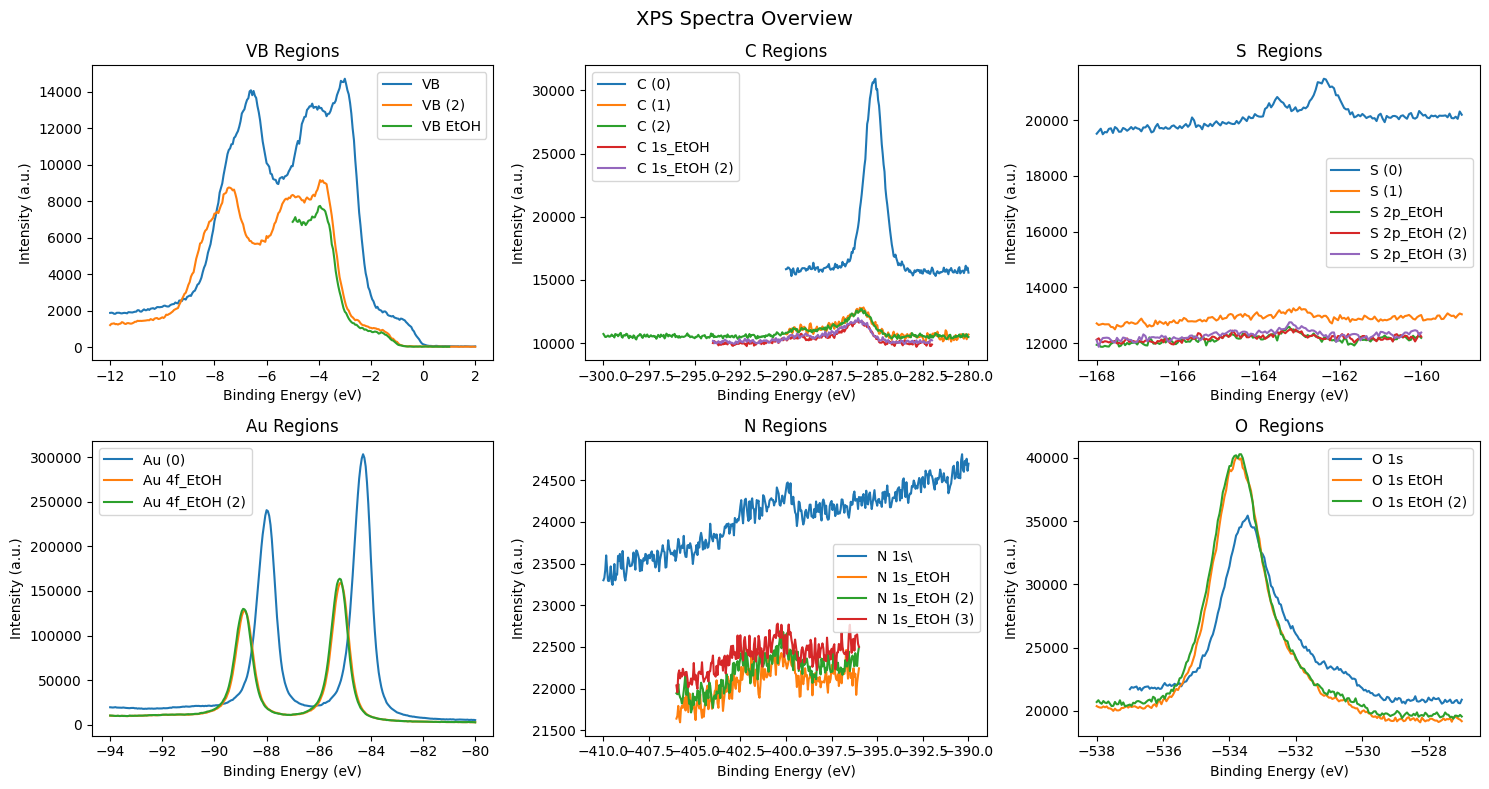

In [13]:
# Plot specific regions
experiment.plot_all_regions(['VB', 'C', 'S ', 'Au', 'N', 'O '])

# Or with more specific patterns
# experiment.plot_all_regions(['C 1s', 'S 2p', 'Au 4f'])

# Or any combination
# experiment.plot_all_regions(['VB', 'Au', 'C'])

plt.show()

In [14]:
experiment.list_regions()

['S (0)',
 'C (0)',
 'Au (0)',
 'VB',
 'S (1)',
 'N 1s\\',
 'C (1)',
 'C (2)',
 'O 1s',
 'VB (2)',
 'N 1s_EtOH',
 'S 2p_EtOH',
 'Au 4f_EtOH',
 'C 1s_EtOH',
 'O 1s EtOH',
 'VB EtOH',
 'N 1s_EtOH (2)',
 'S 2p_EtOH (2)',
 'C 1s_EtOH (2)',
 'O 1s EtOH (2)',
 'N 1s_EtOH (3)',
 'S 2p_EtOH (3)',
 'Au 4f_EtOH (2)']

(<Figure size 800x600 with 1 Axes>,
 <Axes: title={'center': 'XPS Spectrum'}, xlabel='Binding Energy (eV)', ylabel='Intensity (a.u.)'>)

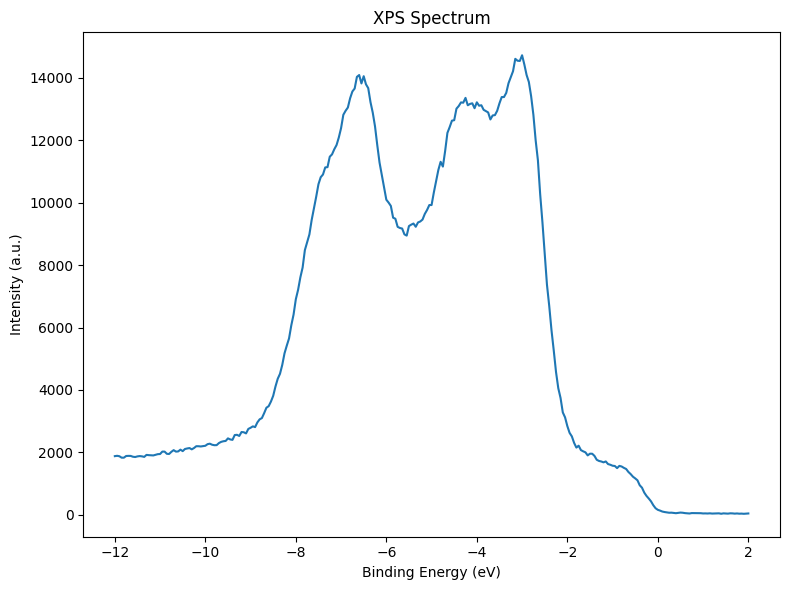

In [15]:
experiment.spectra['VB'].plot(merged_label='all_average')


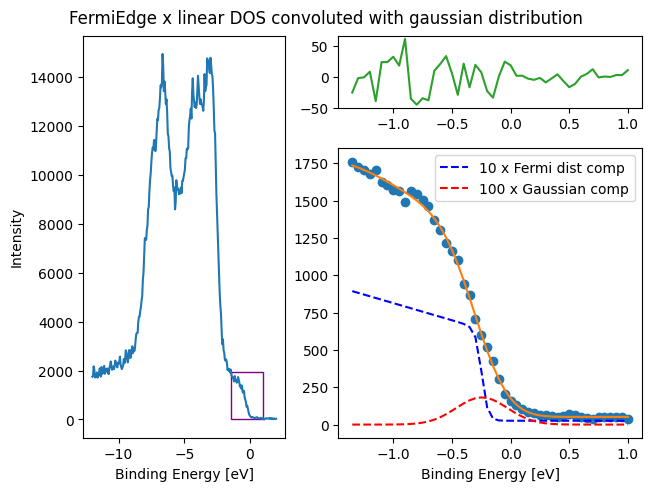

In [19]:
# 1. Fit Fermi Edge
# -----------------
# Get the valence band region
vb_spectrum = experiment.get_region("VB")  # or whatever your VB region is named

# First merge scans if not already merged
vb_spectrum.merge_scans(method='average', label='all_average')

# Fit Fermi edge
result = fitxps.FermiEdge(
    spectrum=vb_spectrum,
    merged_label='all_average',
    xmin=-1.35,  # BE range for fitting
    xmax=1.0,
    A=1.0,      # Initial parameters
    c=0,
    b=0,
    m=0,
    T=300,
    gw=0.5,
    center=-0.7,
    # plot=True
)

# Print fit results
# print("\nFit Results:")
# print(result.fit_report())

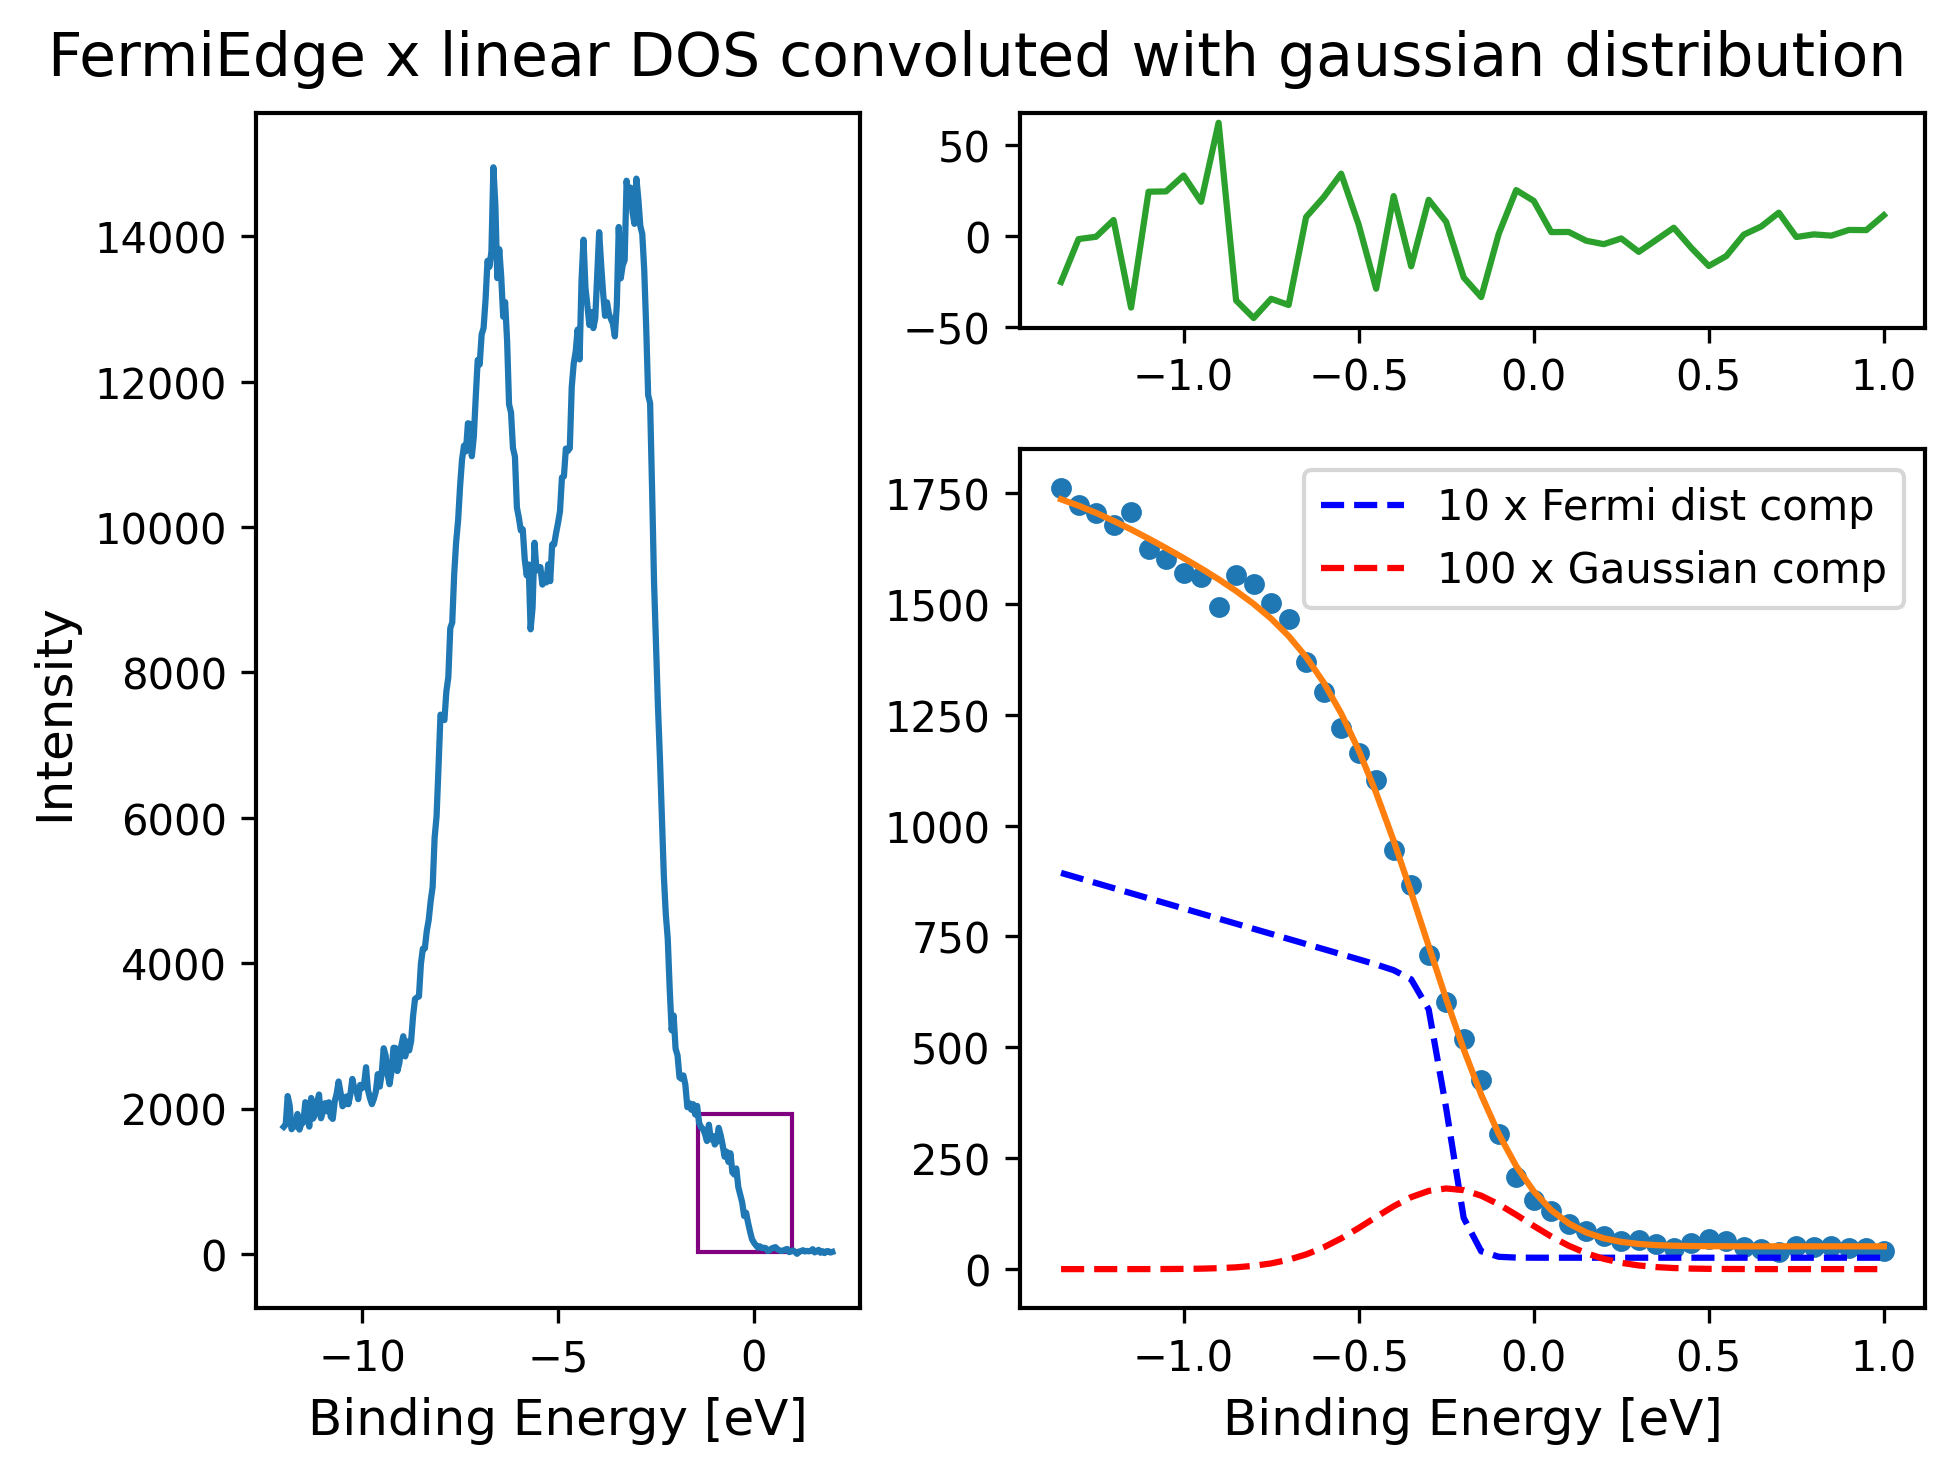

In [24]:
# Set publication style
plot_config.set_plot_style('paper', dpi=300)

fig, axes = fitxps._plot_fermi_edge(vb_spectrum, 'fermi_edge')
plt.savefig('VB_fermi_edge_paper.png', 
            # dpi=300, 
            bbox_inches='tight'
            )
plt.show()

(<Figure size 800x600 with 1 Axes>,
 <Axes: title={'center': 'XPS Spectrum'}, xlabel='Binding Energy (eV)', ylabel='Intensity (a.u.)'>)

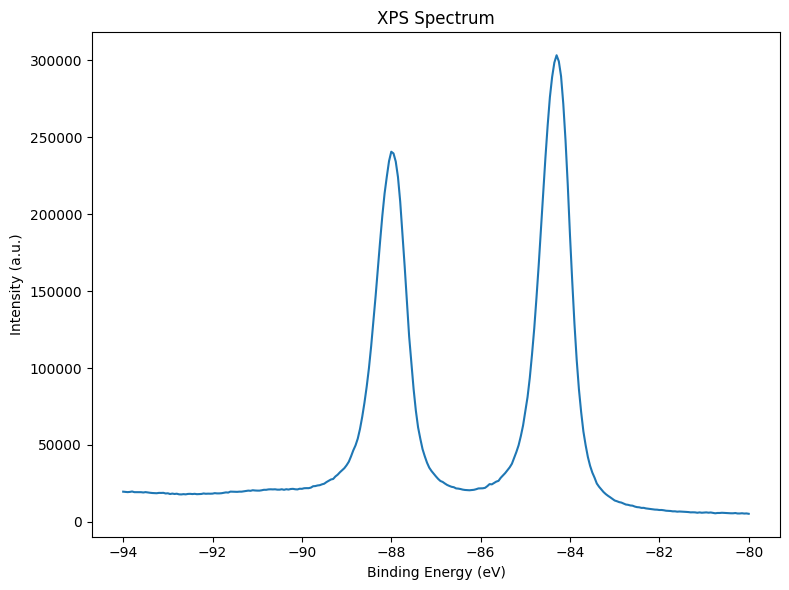

In [17]:
experiment.spectra['Au (0)'].plot(merged_label='all_average')